# DDO4MLA Seminar 4: Mathematical Preliminaries with Python

## Introduction

Welcome back to DDO4MLA! Today's tutorial will briefly cover topics related to optimization theory, such as the convexity of functions and various types of differentiation, namely symbolic, numerical, and automatic differentiation. Understanding these concepts is crucial for solving optimization problems in general and training machine learning models in particular.

## Exercise 1

Why do we care about convexity in the first place? Let us imagine a machine learning model, such as a classification model, which can be described by a vector of parameters, denoted as $w\in\mathbb{R}^n$. This vector $w$ may represent weights of neurons in an artificial neural network, for example. Our goal is to train this model using a given dataset to achieve the best possible performance in terms of classification error. We can formalize this classification error as a function of the model parameters, denoted as $J(w):\mathbb{R}^n\rightarrow\mathbb{R}$. The function $J(w)$ is usually called the cost function.

In this context, training a machine learning model can be seen as finding the optimal parameter values, denoted as $w^*$, that minimize the value of $J(w^*)$. In other words, we aim to find the parameters that result in the smallest classification error. This statement can be formulated more rigorously as:

$$\min_{w\in\mathbb{R}^n}J(w).$$

The optimality of $w^*$ can be verified by checking the sufficient conditions, which are conditions that, when satisfied, guarantee that $w^*$ is optimal. They are:

1. The first order condition: $\nabla_wJ(w^*)=0$, i.e., the gradient vector of the cost function is equal to the zero vector when evaluated at the optimal point $w^*$;
2. The second order condition: $H(w^*)\succ 0$, i.e., the Hessian matrix of the cost function is positive definite when evaluated at the optimal point $w^*$.

So how exactly does knowing whether $J(w)$ is convex or not help us determine the optimal $w^*$? First, let us define what the convexity of a function means. The geometric interpretation of convexity states that a function is convex if the line segment connecting any two points on the function does not lie below the graph of the function. Here is an example of a convex function with one variable.

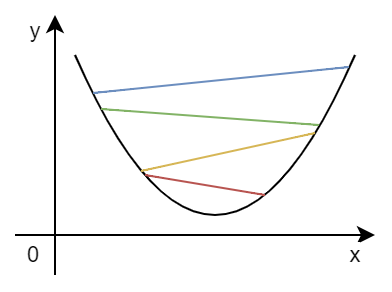

All possible line segments, including the visible ones, lie above the function, indicating that it is convex. Now let us take a look at what a non-convex function might look like.

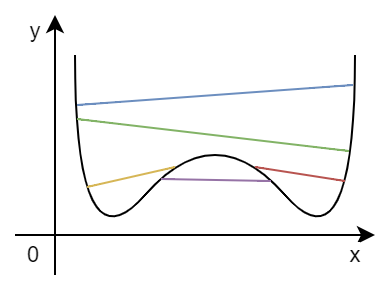

As you can see, one of the line segments, i.e., the violet-colored one, lies below the function, indicating that the function is non-convex.

Convex functions possess a remarkable property: any point that satisfies the first-order optimality condition is a global minimum of the function. In other words, knowing that $J(w)$ is convex allows us to search for the optimal $w^*$ by simply utilizing the fact that $\nabla_wJ(w^*)=0$. When a given function is a function of one variable, $\nabla_wJ(w^*)=0$ can be interpreted as a tangent line to the function at the point $w^*$ with a slope of zero.

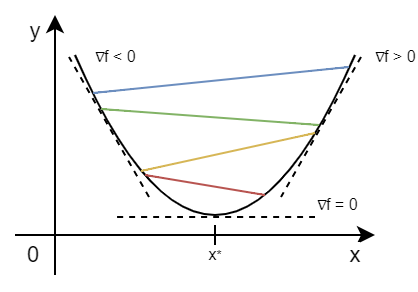

As can be seen above, the tangent line at $x^*$ has a slope of zero. Combined with the fact that this function is convex, it indicates that $x^*$ is a global minimum.

#### Task 1.1

Consider the following quadratic function of two variables:

$$f(x_1, x_2)=x_1^2-x_1x_2-x_2^2.$$

Let us visualize the function using Matplotlib in the cell below.

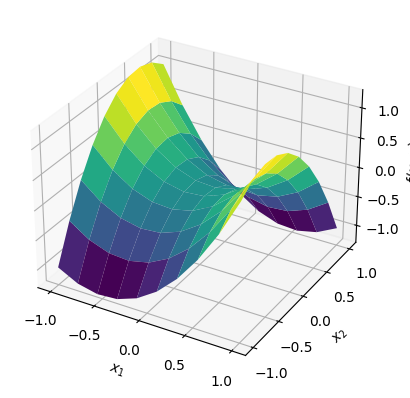

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Compute 10 discrete values of x_1 and x_2
# from -1 to 1
x_1 = np.linspace(-1, 1, 10)
x_2 = np.linspace(-1, 1, 10)

# Compute coordinates of the points
# of the 10-by-10 grid
X_1, X_2 = np.meshgrid(x_1, x_2) 

# Evaluate the function on the grid
F = X_1 ** 2 - X_1 * X_2 - X_2 ** 2

# Plot the function
ax = plt.axes(projection='3d')
ax.plot_surface(X_1, X_2, F, cmap='viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('f(x, y)')
plt.show()

Is this function convex? Write your answer in the cell below. Use the geometrical interpretation of convexity.

**ToDo**

The function is not convex because it is possible to construct a line segment such that it lies below the function graph.

#### Task 1.2

Convexity of a function can be established by examining its Hessian matrix $H(w)$. Namely, assuming $J(w)$ is twice differentiable, it is convex if and only if the Hessian $H(w)$ is positive semi-definite for all $w\in\mathbb{R}^n$.

The quadratic function from the previous task can be represented in the following matrix form:

$$f(x)=\frac{1}{2}x^TQx+q^Tx+c,$$

with

$$Q=\begin{bmatrix}2 & -1\\-1 & -2\end{bmatrix},\;q=\begin{bmatrix}0\\0\end{bmatrix},\;c=0,$$

where $Q$ is the Hessian of $f(x)$, $q$ is the vector containing coefficients of linear components, and $c$ is the constant term.

Determine whether $f(x)$ is convex by performing computations in the cell below.

In [2]:
import numpy as np
import numpy.linalg as la

# ToDo: Compute the necessary information
Q = np.array([[ 2, -1],
              [-1, -2]])

w, _ = la.eig(Q)
w

array([ 2.23606798, -2.23606798])

Write your conclusion in the cell below.

**ToDo**

The Hessian matrix $Q$ of $f(x)$ has both positive and negative eigenvalues, indicating that it is indefinite. As a result, $f(x)$ is not convex.

## Exercise 2

#### Task 2.1

Consider the following quadratic function of three variables without linear or constant terms:

$$f(x_1,x_2,x_3)=3x_1^2-2x_2^2+4x_1x_2-x_3^2+2x_2x_3.$$

The cell below defines its Hessian $Q_f$ and computes the eigenvalues of $Q_f$.

In [3]:
# Define the Hessian of f(x)
Q_f = np.array([[6,  4,  0],
                [4, -4,  2],
                [0,  2, -2]])

# Compute and display the eigenvalues of Q_f
w, _ = la.eig(Q_f)
w

array([ 7.45089747, -6.24796636, -1.20293111])

Inspecting the eigenvalues of $Q_f$ reveals that the function is non-convex. Based on $f(x)$ create a new function $g(x)$ by defining its positive semi-definite Hessian $g(x)$ using the technique from the previous tutorial. Make sure that it is positive semi-definite by examining the eigenvalues of its Hessian.

In [4]:
# ToDo: Create positive semi-definite Q_g based on Q_f
lambda_min = w.min()
gamma = -lambda_min + 1e-8
Q_g = Q_f + gamma * np.eye(Q_f.shape[0])

# Compute and display the eigenvalues of Q_g
w, _ = la.eig(Q_g)
w

array([1.36988638e+01, 9.99999807e-09, 5.04503526e+00])

#### Task 2.2

Demonstrating the convexity of a function of three variables, $f(x_1, x_2, x_3)$, can be challenging. However, it is possible to plot its subfunctions, such as $f(x_1, x_2, 0)$, $f(x_1, 0, x_3)$, and $f(0, x_2, x_3)$, and visually assess their convexity.

The cell below evaluates these subfunctions along with $g(x_1, x_2, 0)$, $g(x_1, 0, x_3)$, and $g(0, x_2, x_3)$.

In [5]:
# Compute 10 discrete values of x_1 and x_2
# from -1 to 1
x_1 = np.linspace(-1, 1, 10)
x_2 = np.linspace(-1, 1, 10)

# Compute coordinates of the points
# of the 10-by-10 grid
X_1, X_2 = np.meshgrid(x_1, x_2) 

# Arrays for storing values of f(x_1, x_2, 0)
# and g(x_1, x_2, 0)
F12 = np.zeros(X_1.shape)
G12 = np.zeros(X_1.shape)

# Arrays for storing values of f(x_1, 0, x_3)
# and g(x_1, 0, x_3)
F13 = np.zeros(X_1.shape)
G13 = np.zeros(X_1.shape)

# Arrays for storing values of f(0, x_2, x_3)
# and g(0, x_2, x_3)
F23 = np.zeros(X_1.shape)
G23 = np.zeros(X_1.shape)

# Evaluate the functions at all points
# of the grid
for i in range(0, X_1.shape[0]):
    for j in range(0, X_1.shape[1]):
        # Evaluate f(x_1, x_2, 0) and g(x_1, x_2, 0)
        x = np.array([X_1[i, j], X_2[i, j], 0])
        F12[i, j] = x.T @ Q_f @ x
        G12[i, j] = x.T @ Q_g @ x
        
        # Evaluate f(x_1, 0, x_3) and g(x_1, 0, x_3)
        x = np.array([X_1[i, j], 0, X_2[i, j]])
        F13[i, j] = x.T @ Q_f @ x
        G13[i, j] = x.T @ Q_g @ x
        
        # Evaluate f(0, x_2, x_3) and g(0, x_2, x_3)
        x = np.array([0, X_1[i, j], X_2[i, j]])
        F23[i, j] = x.T @ Q_f @ x
        G23[i, j] = x.T @ Q_g @ x

Now let us plot the subfunctions by running the cell below.

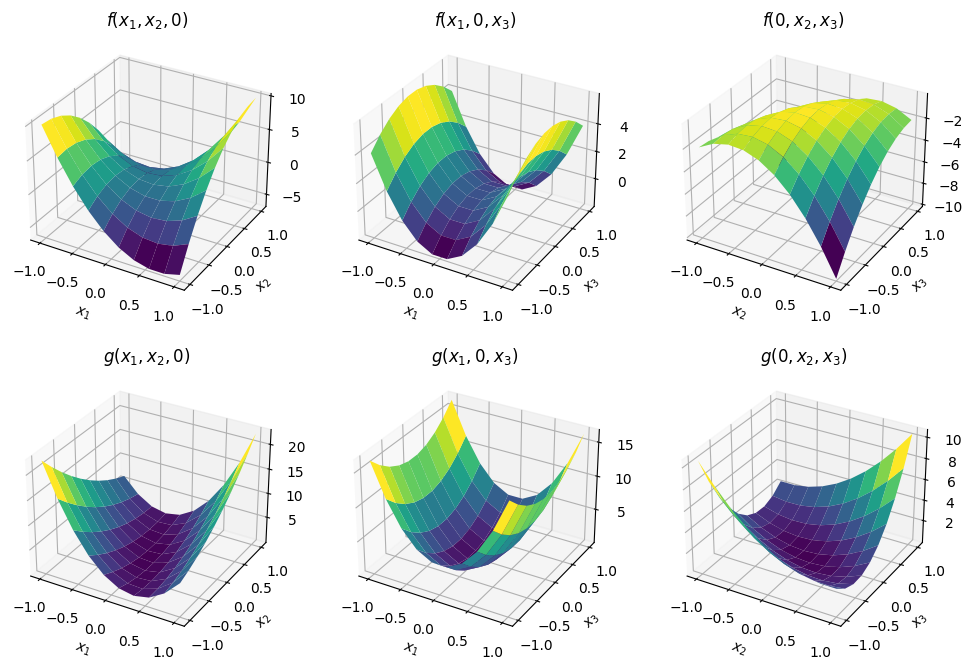

In [6]:
# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot f(x_1, x_2, 0)
ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.plot_surface(X_1, X_2, F12, cmap='viridis')
ax.set_title('$f(x_1, x_2, 0)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Plot g(x_1, x_2, 0)
ax = fig.add_subplot(2, 3, 4, projection='3d')
ax.plot_surface(X_1, X_2, G12, cmap='viridis')
ax.set_title('$g(x_1, x_2, 0)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Plot f(x_1, 0, x_3)
ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.plot_surface(X_1, X_2, F13, cmap='viridis')
ax.set_title('$f(x_1, 0, x_3)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_3$')

# Plot g(x_1, 0, x_3)
ax = fig.add_subplot(2, 3, 5, projection='3d')
ax.plot_surface(X_1, X_2, G13, cmap='viridis')
ax.set_title('$g(x_1, 0, x_3)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_3$')

# Plot f(0, x_2, x_3)
ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.plot_surface(X_1, X_2, F23, cmap='viridis')
ax.set_title('$f(0, x_2, x_3)$')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_3$')

# Plot g(0, x_2, x_3)
ax = fig.add_subplot(2, 3, 6, projection='3d')
ax.plot_surface(X_1, X_2, G23, cmap='viridis')
ax.set_title('$g(0, x_2, x_3)$')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_3$')

# Show the figure
plt.show()

All of the subfunctions of $f(x_1, x_2, x_3)$ are non-convex, which immediately indicates that the function itself is non-convex, as is the case. On the other hand, the subfunctions of $g(x_1, x_2, x_3)$ are convex.

We already estabished that $g(x_1,x_2,x_3)$ is convex, but suppose we do not know that. In this case, if all the aforementioned subfunctions of $g(x_1, x_2, x_3)$ are convex, does it necessarily mean that $g(x_1, x_2, x_3)$ is convex? Write your answer below.

**ToDo**

Consider a function $f(x_1,x_2,x_3)$ with the following Hessian matrix:

$$Q=\begin{bmatrix}0.67 & 0.45 & 0.21\\0.45 & 0.36 & -0.3\\0.21 & -0.3 & 0.86\end{bmatrix}.$$

Let us see if its convex by checking whether its Hessian is positive semi-definite.

In [7]:
# Define the Q matrix
Q = np.array([[.67, .45, .21],
              [.45, .36, -.3],
              [.21, -.3, .86]])

# Compute and display its eigenvalues
w, _ = la.eig(Q)
w

array([-0.10054518,  0.99      ,  1.00054518])

As it can be seen, the function is not convex. What about convexity of its subfunctions $f(x_1, x_2, 0)$, $f(x_1, 0, x_3)$, $f(0, x_2, x_3)$? Since they are functions of two variables, their Hessians $Q_{12}$, $Q_{13}$, $Q_{23}$ can be obtained by removing elements related to $x_3$, $x_2$ and $x_1$ respectively from the original Hessian $Q$. Let us see if they reflect non-convexity of the original function.

In [8]:
# Define the Q12 matrix
Q12 = np.array([[.67, .45],
                [.45, .36]])

# Compute and display its eigenvalues
w, _ = la.eig(Q12)
w

array([0.99094643, 0.03905357])

In [9]:
# Define the Q13 matrix
Q13 = np.array([[.67, .21],
                [.21, .86]])

# Compute and display its eigenvalues
w, _ = la.eig(Q13)
w

array([0.53451139, 0.99548861])

In [10]:
# Define the Q23 matrix
Q23 = np.array([[.36, -.3],
                [-.3, .86]])

# Compute and display its eigenvalues
w, _ = la.eig(Q23)
w

array([0.21948752, 1.00051248])

The subfunctions turned out to be convex since their Hessians are positive definite. The original function, however, is not convex. This counterexample shows us that the convexity of subfunctions does not necessarily lead to the convexity of the original one.

## Exercise 3

Solving optimization problems usually requires information about first-order and, in some cases, second-order derivatives of the function being minimized. Typically, one would start by analytically finding the first-order derivatives of the given function with respect to the decision variables, e.g., $\nabla_wJ(w)$, and then define it as a Python function. Subsequently, this function is called whenever the optimization algorithm requires the computation of the first-order derivatives.

There are, however, three alternatives you can resort to instead:

- Symbolic differentiation — involves programmatically processing a mathematical expression representing a function using differentiation rules, such as the chain rule and product rule. This process results in another mathematical expression representing the derivative of that function;
- Numerical differentiation — derivatives are approximated using formulas of numerical differentiation, e.g., central finite difference. This method is employed when an analytical expression for the derivative is not available or when dealing with functions that are challenging to differentiate symbolically;
- Automatic differentiation — differentiates functions by breaking down their code into a sequence of elementary mathematical operations and applying differentiation rules. It is somewhat related to symbolic differentiation, although automatic differentiation operates with a computation graph rather than a mathematical expression. This allows it to handle complex functions.

Let us apply these technique to the following non-linear function of a single variable:

$$h(x)=2x^5-x^4+3x^2-4x+13.$$

The cell below defines the function.

In [11]:
def h(x):
    return 2 * x ** 5 - x ** 4 + 3 * x ** 2 - 4 * x + 13

#### Task 3.1

Find the first order and second order derivatives of $h(x)$ analytically and define them as functions below.

In [12]:
def dhdx(x):
    # ToDo: Compute the first order derivative of h(x)
    return 10 * x ** 4 - 4 * x ** 3 + 6 * x - 4

def d2hdx2(x):
    # ToDo: Compute the first order derivative of h(x)
    return 40 * x ** 3 - 12 * x ** 2 + 6

#### Task 3.2

The SymPy library allows for symbolic differentiation. One possible way to differentiate $h(x)$ w.r.t. $x$ is to follow these steps:

1. Define the SymPy symbol `x_sy` for the variable $x$;
2. Evaluate Python function `h(x_sy)` for `x_sy` to obtain its SymPy expression `h_sy`;
3. Finally, differentiate the expression `h_sy` using the method `diff`.

The method `diff` takes the expression as the first argument and the variable to differentiate with respect to as the second argument. To take multiple derivatives, one can pass the variable as many times as is needed to differentiate, or pass a number after the variable. Obviously, to take the second order derivative it is also possible to differentiate the first order derivative again as done in the cell below. The method `pprint` can be used to print the expression representing the derivative using the ASCII pretty printer.

In [13]:
import sympy as sy

# Define the symbol x
x_sy = sy.Symbol('x')

# Obtain the SymPy expression for h(x)
h_sy = h(x_sy)

# Derive and display the first order derivative
dhdx_sy = sy.diff(h_sy, x_sy)
sy.pprint(dhdx_sy)

# Derive and display the second order derivative
d2hdx2_sy = sy.diff(dhdx_sy, x_sy)
sy.pprint(d2hdx2_sy)

    4      3          
10⋅x  - 4⋅x  + 6⋅x - 4
    3       2    
40⋅x  - 12⋅x  + 6


To evaluate the SymPy expression for a numerical value one can use the method `subs`. The first argument corresponds to the SymPy symbol and the second argument corresponds to its numerical value. The cell below compares analytical and symbolical derivatives for $x=42$.

In [14]:
# Test value of x
x = 42

# Evaluate the analytical and symbolical
# first order derivatives
print('Analytical dhdx:', dhdx(x))
print('Symbolical dhdx:', dhdx_sy.subs(x_sy, x))

# Evaluate the analytical and symbolical
# second order derivatives
print('Analytical d2hdx2:', d2hdx2(x))
print('Symbolical d2hdx2:', d2hdx2_sy.subs(x_sy, x))

Analytical dhdx: 30820856
Symbolical dhdx: 30820856
Analytical d2hdx2: 2942358
Symbolical d2hdx2: 2942358


Now let us look at the expressions for the analytically obtained derivatives and compare them with the symbolical ones. Evaluate the functions from **Task 3.1** for the SymPy symbol of $x$, print the resulting expressions and make sure that they are the same as the expressions obtained via SymPy.

In [15]:
# ToDo: Print expressions for function dhdx(x) and d2hdx2(x)
sy.pprint(dhdx(x_sy))
sy.pprint(d2hdx2(x_sy))

    4      3          
10⋅x  - 4⋅x  + 6⋅x - 4
    3       2    
40⋅x  - 12⋅x  + 6


Keep in mind that SymPy is much more than just this! Check its documentation and tutorials for more information [[1](#references)].

#### Task 3.3

First order and second order derivatives can be computed numerically by approximating them with the following central finite difference formulas:

$$f'(x)\approx\frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x},$$

$$f''(x)\approx\frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2},$$

where the approximation gets better as $\Delta x$ gets smaller.

However, in a computer decreasing $\Delta x$ eventually introduces significant error due to roundoff errors. This means that we cannot decrease $\Delta x$ as much as we may desire.

Define functions below to compute these approximations for $h(x)$.

In [16]:
def dhdx_nd(x, dx):
    # ToDo: Compute the approximate first order derivative
    return (h(x + dx) - h(x - dx)) / (2 * dx)

def d2hdx2_nd(x, dx):
    # ToDo: Compute the approximate first order derivative
    return (h(x + dx) - 2 * h(x) + h(x - dx)) / (dx ** 2)

Run the cell below to see the difference between the analytical and numerical values when $x=1\times10^{-3}$.

In [17]:
# Test value of x
x = 42

# Discretization step dx
dx = 1e-3

# Evaluate the analytical and symbolical
# first order derivatives
print('Analytical dhdx:', dhdx(x))
print('Numerical dhdx:', dhdx_nd(x, dx))

# Evaluate the analytical and symbolical
# second order derivatives
print('Analytical d2hdx2:', d2hdx2(x))
print('Numerical d2hdx2:', d2hdx2_nd(x, dx))

Analytical dhdx: 30820856
Numerical dhdx: 30820856.035023928
Analytical d2hdx2: 2942358
Numerical d2hdx2: 2942358.0169677734


Can we continue reducing $\Delta x$ to achieve a better approximation? The answer is no. While the approximation error decreases as $\Delta x$ becomes smaller, the roundoff errors actually increase. As a result, the overall error eventually grows, rendering the approximation inadequate.

#### Task 3.4

The Autograd library is specifically designed for performing automatic differentiation tasks. It achieves this by wrapping NumPy functions with automatic differentiation functionality. Therefore, to use Autograd, we need to import its wrapped version of NumPy.

In [18]:
import autograd.numpy as np
from autograd import grad

To differentiate a given function, we use the `grad` function of Autograd.

In [19]:
# Obtain the first order derivative
dhdx_ag = grad(h)

# Obtain the second order derivative
d2hdx2_ag = grad(dhdx_ag)

Now let us compare analytical and automatic derivatives. Note that the input variable `x` has to be a NumPy array.

In [20]:
# Test value of x
x = np.array([42])

# Evaluate the analytical and automatic
# first order derivatives
print('Analytical dhdx:', dhdx(x))
print('Automatic dhdx:', dhdx_ag(x))

# Evaluate the analytical and symbolical
# second order derivatives
print('Analytical d2hdx2:', d2hdx2(x))
print('Automatic d2hdx2:', d2hdx2_ag(x))

Analytical dhdx: [30820856]
Automatic dhdx: [30820856.]
Analytical d2hdx2: [2942358]
Automatic d2hdx2: [2942358.]


The derivatives seem to match perfectly. Check out the official GitHub page of Autograd if you want to learn more [[2](#references)].

#### Comparison Between Symbolic, Numerical and Automatic Differentiation

Finally, let us see how the obtained derivatives look like for a range of values of $x\in[-1,1]$ and whether they differ.

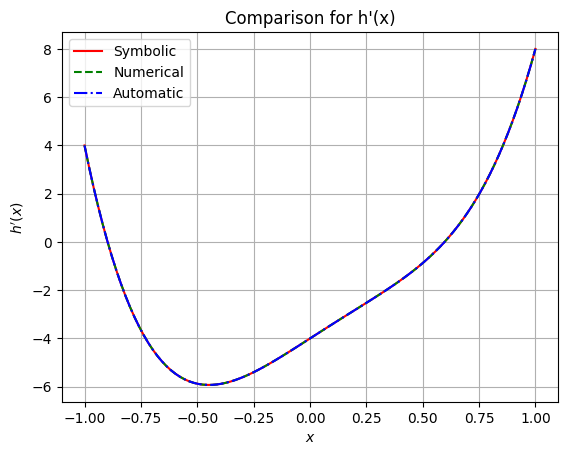

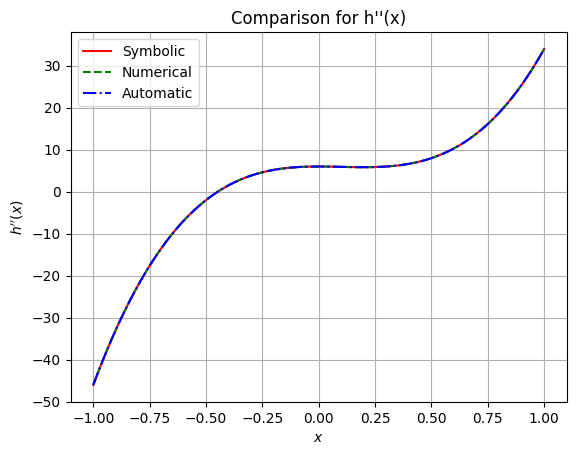

In [21]:
# Discretization step dx for numerical differentiation
dx = 1e-3

# Compute 100 equidistant points from -1 to 1
X = np.linspace(-1, 1, 100)

# Compute values of first order derivatives using all the
# methods above
dhdx_sy_values = list(map(lambda x: dhdx_sy.subs(x_sy, x), X))
dhdx_nd_values = dhdx_nd(X, dx)
dhdx_ag_values = list(map(dhdx_ag, X))

# Plot the results
plt.plot(X, dhdx_sy_values, 'r-', label='Symbolic')
plt.plot(X, dhdx_nd_values, 'g--', label='Numerical')
plt.plot(X, dhdx_ag_values, 'b-.', label='Automatic')
plt.xlabel('$x$')
plt.ylabel('$h\'(x)$')
plt.grid()
plt.legend()
plt.title('Comparison for h\'(x)')
plt.show()

# Compute values of first order derivatives using all the
# methods above
d2hdx2_sy_values = list(map(lambda x: d2hdx2_sy.subs(x_sy, x), X))
d2hdx2_nd_values = d2hdx2_nd(X, dx)
d2hdx2_ag_values = list(map(d2hdx2_ag, X))

# Plot the results
plt.plot(X, d2hdx2_sy_values, 'r-', label='Symbolic')
plt.plot(X, d2hdx2_nd_values, 'g--', label='Numerical')
plt.plot(X, d2hdx2_ag_values, 'b-.', label='Automatic')
plt.xlabel('$x$')
plt.ylabel('$h\'\'(x)$')
plt.grid()
plt.legend()
plt.title('Comparison for h\'\'(x)')
plt.show()

In this circumstance everything seems to be in order. Now let us zoom in to the range $x\in[-0.01,0.01]$.

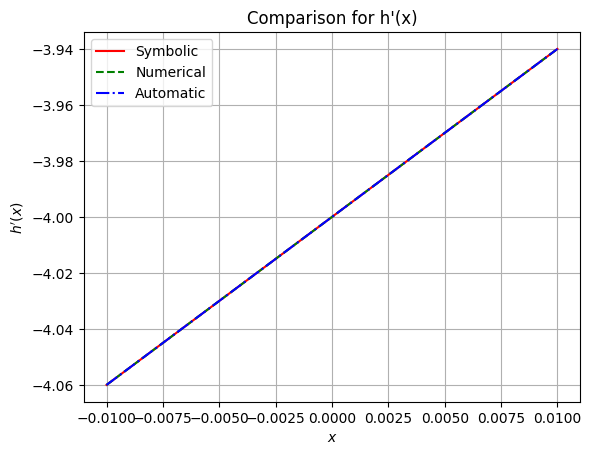

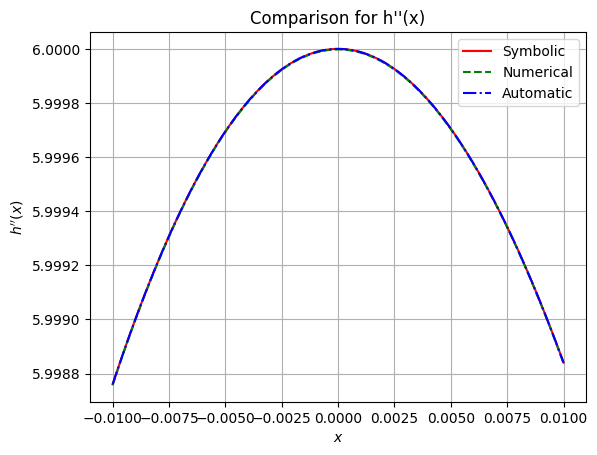

In [22]:
# Discretization step dx for numerical differentiation
dx = 1e-3

# Compute 100 equidistant points from -0.01 to 0.01
X = np.linspace(-0.01, 0.01, 100)

# Compute values of first order derivatives using all the
# methods above
dhdx_sy_values = list(map(lambda x: dhdx_sy.subs(x_sy, x), X))
dhdx_nd_values = dhdx_nd(X, dx)
dhdx_ag_values = list(map(dhdx_ag, X))

# Plot the results
plt.plot(X, dhdx_sy_values, 'r-', label='Symbolic')
plt.plot(X, dhdx_nd_values, 'g--', label='Numerical')
plt.plot(X, dhdx_ag_values, 'b-.', label='Automatic')
plt.xlabel('$x$')
plt.ylabel('$h\'(x)$')
plt.grid()
plt.legend()
plt.title('Comparison for h\'(x)')
plt.show()

# Compute values of first order derivatives using all the
# methods above
d2hdx2_sy_values = list(map(lambda x: d2hdx2_sy.subs(x_sy, x), X))
d2hdx2_nd_values = d2hdx2_nd(X, dx)
d2hdx2_ag_values = list(map(d2hdx2_ag, X))

# Plot the results
plt.plot(X, d2hdx2_sy_values, 'r-', label='Symbolic')
plt.plot(X, d2hdx2_nd_values, 'g--', label='Numerical')
plt.plot(X, d2hdx2_ag_values, 'b-.', label='Automatic')
plt.xlabel('$x$')
plt.ylabel('$h\'\'(x)$')
plt.grid()
plt.legend()
plt.title('Comparison for h\'\'(x)')
plt.show()

Everything still seems to be completely normal. But what happens if we use a smaller discretization step for numerical differentiation, e.g., $\Delta x=0.5\times10^{-5}$? Let us find out by running the cell below.

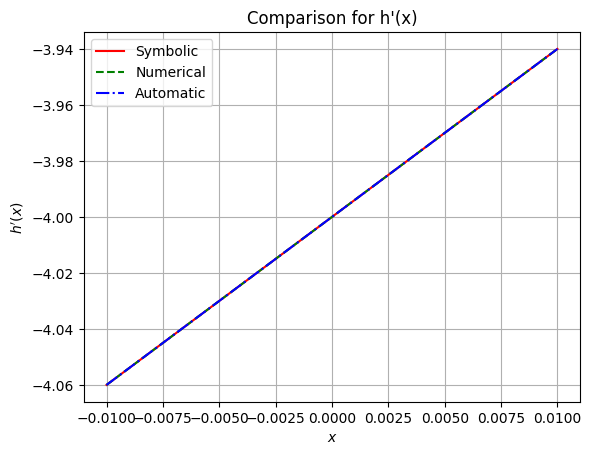

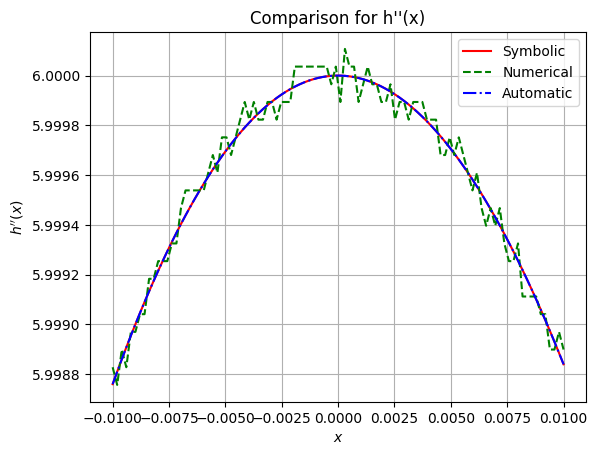

In [23]:
# Discretization step dx for numerical differentiation
dx = .5e-5

# Compute 100 equidistant points from -0.01 to 0.01
X = np.linspace(-0.01, 0.01, 100)

# Compute values of first order derivatives using all the
# methods above
dhdx_sy_values = list(map(lambda x: dhdx_sy.subs(x_sy, x), X))
dhdx_nd_values = dhdx_nd(X, dx)
dhdx_ag_values = list(map(dhdx_ag, X))

# Plot the results
plt.plot(X, dhdx_sy_values, 'r-', label='Symbolic')
plt.plot(X, dhdx_nd_values, 'g--', label='Numerical')
plt.plot(X, dhdx_ag_values, 'b-.', label='Automatic')
plt.xlabel('$x$')
plt.ylabel('$h\'(x)$')
plt.grid()
plt.legend()
plt.title('Comparison for h\'(x)')
plt.show()

# Compute values of first order derivatives using all the
# methods above
d2hdx2_sy_values = list(map(lambda x: d2hdx2_sy.subs(x_sy, x), X))
d2hdx2_nd_values = d2hdx2_nd(X, dx)
d2hdx2_ag_values = list(map(d2hdx2_ag, X))

# Plot the results
plt.plot(X, d2hdx2_sy_values, 'r-', label='Symbolic')
plt.plot(X, d2hdx2_nd_values, 'g--', label='Numerical')
plt.plot(X, d2hdx2_ag_values, 'b-.', label='Automatic')
plt.xlabel('$x$')
plt.ylabel('$h\'\'(x)$')
plt.grid()
plt.legend()
plt.title('Comparison for h\'\'(x)')
plt.show()

It turns out that the second-order derivative obtained via numerical approximation is quite noisy. Theoretically, we expect the approximation to improve as we decrease the discretization step. However, in practice, roundoff errors can increase the overall approximation error, which is evident from the observed noise on the graph.

<a name="references"></a>

## References

1.   https://docs.sympy.org/latest/index.html#
2.   https://github.com/HIPS/autograd